In [1]:
from DepthVisualizer import DepthRenderer, Utils
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
renderer = DepthRenderer(1200, 800, camera_fov=100)
renderer.hide_window()  # If you only want to extract rendered frames, you can disable window with this command
renderer.set_camera_coords(0, 0, 0)  # Camera originally starts at [0, 10, -10]
renderer.change_camera_rotation(0, 10)  # Camera originally has pitch of -10

In [3]:
rgb_image = cv2.cvtColor(cv2.imread("example_image.png"), cv2.COLOR_BGR2RGB)
predicted_depth_map = Utils.read_depth_map("example_predicted_depth.png")  # Assumes depth map is stored as 16 uint grayscale image where depth values are scaled by 256

In [4]:
kitti_calib = Utils.read_kitti_calibration("example_calib.txt")
focal_length = kitti_calib["focal_length"]
principal_point = kitti_calib["principal_point"]

In [5]:
points = Utils.convert_depthmap_to_points(predicted_depth_map, focal_length, principal_point, rgb_image)
renderer.set_points(points)

In [6]:
help(renderer.add_3d_bbox)

Help on method add_3d_bbox in module DepthVisualizer.DepthVisualizer:

add_3d_bbox(bbox_data, color=[255, 255, 255]) method of DepthVisualizer.DepthVisualizer.DepthRenderer instance
    Draws 3d bounding box
    :param bbox_data: [center_x, center_y, center_z, width, height, length, y_rotation]
    :param color: A 3 element list that contains color [Red, Green, Blue], example = [255, 255, 255] for white
    :return: None



In [7]:
help(Utils.convert_points_to_voxel_map)

Help on function convert_points_to_voxel_map in module DepthVisualizer.DepthVisualizer:

convert_points_to_voxel_map(points, voxel_map_center, voxel_map_size, voxel_size)
    Converts points that are inside specified 3D box into voxels
    :param points: List of points where each point has following format [x, y, z, r, g, b]
    :param voxel_map_center: Center coordinates of the area that will be voxellized in format [x, y, z]
    :param voxel_map_size: Size of the area that will be voxellized in format [width, height, length]
    :param voxel_size: Size of the each voxel
    :return: A 3D array in x-y-z format where each element is list of size 3 that represents color



In [8]:
renderer.add_3d_bbox([-1.5, -1, 8, 4, 2, 4, 0])
voxels = Utils.convert_points_to_voxel_map(points, [-1.5, -1, 8], [4, 2, 4], 0.05)  # This method allows us to convert points to voxel map
renderer.add_voxel_map(voxels, [-1.5, -1, 8], 0.05)  # This method is used for rendering voxel_map, note that we are using same values for voxel
# map centers, this will result in voxels sitting on top of points

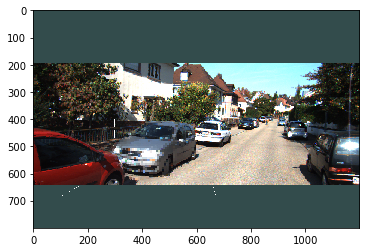

In [9]:
renderer.render()
frame = renderer.get_rendered_frame()
plt.imshow(frame)

In [10]:
renderer.move_forward(5)
renderer.change_camera_rotation(-25, -15)

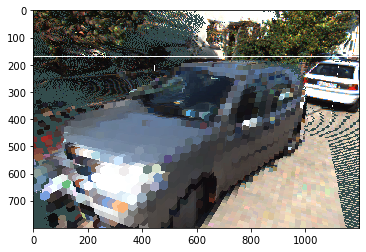

In [11]:
renderer.render()
frame = renderer.get_rendered_frame()
plt.imshow(frame)

In [12]:
renderer.render_voxels = False
# Also exists : renderer.render_points & renderer.render_lines that can enable/disable rendering of points, lines & voxels

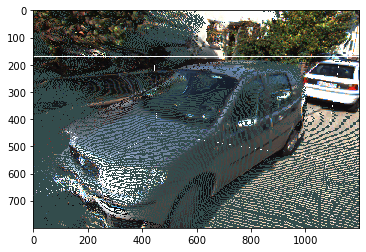

In [13]:
renderer.render()
frame = renderer.get_rendered_frame()
plt.imshow(frame)

In [14]:
renderer.close()